# Classify digits for a more complicated version of MNIST dataset

## Synopsis 
In the field of Computer Vision, image classification is a well know and powerful method that has been enhanced in order to produce some remarkable achievements. This project challenges in attempting the classification of digits in the range of 0 to 9 through the usage of a Convolutional Neural Network. We have been provided with a nosy dataset already divided into training set and testining set. Following the CNN process, we have then subdivide the training set into train set and validation set in order to tune our model and execute the predictions. The best model we were able to build scored us an accuracy of 0.9688 %. 

## Tools 
The codes have been scripted into Python and due to some technical issues, we were constrained to work on Visual Studio Code. The mostly used tools are the Keras framework for building the Convulational Neural Network, numpy for preprocessing and pandas for creating the final dataframe containing the predictions. All predictions were written to  csv files. 

## Set up of the working environment
Make sure that you have install these main modules:
- Numpy in order to transform, manipulate and process the data
- Matplotlib in order to plot
- Scikit-learn's train-test_split in order to divide the train set into a train and validation set
- Keras in order to build the model and make the preprocessing 
- Pandas in order to read in  the csv file and generate the final sample


In [46]:
#Imports
 
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, \
Input, BatchNormalization,Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Conv2DTranspose,UpSampling2D,LeakyReLU,MaxPool2D
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split,KFold

## Data loading 
Downloaded from a private Kaggle challenge created by Dr Nadiya Shvai for S20. The data is made of 12000 observations in training set and 50000 observations in testing set, respectively with 785 and 784 rows. 
Datasets have firstly been downloaded from Kaggle and the loaded into the PYNB as follow: 

In [47]:
def load_dataset():
    #load dataset
    trainset = pd.read_csv(r"C:\Users\Light\Desktop\Artificial Neural Network\train_data.csv", header = None)
    testset = pd.read_csv(r"C:\Users\Light\Desktop\Artificial Neural Network\test_data.csv", header = None)
    
    #Summary of loaded data
    print("shape of train set: ", trainset.shape)
    print("shape of test set: ", testset.shape)

    
    return trainset, testset

In [48]:
trainset, testset = load_dataset()

shape of train set:  (12000, 785)
shape of test set:  (50000, 784)


## Data Preprocessing
The respective shapes of the loaded train and test sets are as follow: (12000,785) and (50000,784)
We have done the preprocessig part in multiple parts:
- Dividing the train set into train and validation set (with respect to the 0.8:0.2 ratio)

- Dividing the new train set into xtrain (normalised) and ytrain (the last 785th column, consisted of the class of digits); applied the same steps to the validation set. We then have four created sets from train and validation sets added to the known test sets that have been converted into arrays. 

- Reshaping the xtrain set into the raw pixel form of (28x28), this allows to observ the noise.

- Building an autoencoder in order to clear the noise up.


In [53]:
def preprocessing(trainset, testset):
    #split train into a training set and a validation set 
    xtrain, xval = train_test_split(trainset, test_size = 0.2, random_state = 42)

    #derive xtrain,ytrain, xval,yval 
    #training sets: order here is important
    ytrain = xtrain.iloc[:,-1:] 
    xtrain = xtrain.iloc[:,:-1]

    #validation sets: order here is important
    yval = xval.iloc[:,-1:]
    xval = xval.iloc[:,:-1]

    #assign xtest
    xtest = test

    #convert to arrays 
    xtrain = np.array(xtrain)
    xtest = np.array(xtest)
    xval = np.array(xval)
    yval = np.array(yval)
    ytrain = np.array(ytrain)

    #reshape to enble plotting of some of the raw pixel data 
    xtrain = xtrain.reshape((xtrain.shape[0],28,28))
    xtest = xtest.reshape((xtest.shape[0],28,28))
    xval = xval.reshape((xval.shape[0],28,28))

    print('xtrain shape is:', xtrain.shape)
    print('xtest shape is:', xtest.shape)
    print('xval shape is:', xval.shape)
    
    
    # plot first few images
    for i in range(9):
    # define subplot
        plt.subplot(330 + 1 + i)
    # plot raw pixel data
        plt.imshow(xtrain[i], cmap=plt.get_cmap('gray'))
    # show the figure
    plt.show()
    

    # reshape the dataset of the exercise to hae a single channel
    xtrain = xtrain.reshape((xtrain.shape[0], 28, 28, 1))
    xtest = xtest.reshape((xtest.shape[0], 28, 28, 1))
    xval = xval.reshape((xval.shape[0], 28, 28, 1))

    #print final shapes of datasets
    print("final shape of xtrain set", xtrain.shape)
    print("final shape of xtest set", xtest.shape)
    print("final shape of xval set", xval.shape)
    
     
    #one hot encode 
    number_of_classes=10
    ytrain=np_utils.to_categorical(ytrain)
    yval=np_utils.to_categorical(yval)

    #check  shapes of target variables
    print('shape of ytrain and yval are:', ytrain.shape, yval.shape)
    
    #check results of encoding
    print("first 4 rows of encoded yval", yval[0:4])
    print("first 4 rows of encoded ytrain", yval[0:4])

 
    return xtrain, xval, yval, ytrain, xtest

     

xtrain shape is: (9600, 28, 28)
xtest shape is: (50000, 28, 28)
xval shape is: (2400, 28, 28)


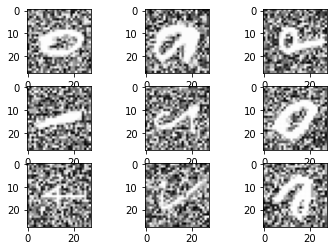

final shape of xtrain set (9600, 28, 28, 1)
final shape of xtest set (50000, 28, 28, 1)
final shape of xval set (2400, 28, 28, 1)
shape of ytrain and yval are: (9600, 10) (2400, 10)
first 4 rows of encoded yval [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
first 4 rows of encoded ytrain [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [54]:
xtrain, xval, yval, ytrain, xtest=preprocessing(train, test)

In [55]:
#import from keras dataset
from keras.datasets import cifar10, mnist


(x_mnist_train, _), (x_mnist_test, _) = mnist.load_data()
x_mnist_train = x_mnist_train.reshape(x_mnist_train.shape[0],28,28,1)
x_mnist_test = x_mnist_test.reshape((x_mnist_test.shape[0],28,28,1))

#converting from integers to float
x_mnist_train = x_mnist_train.astype('float32')
    
#z-score
mean = np.mean(x_mnist_train,axis=(0,1,2))
std = np.std(x_mnist_train,axis=(0,1,2))
x_mnist_train = (x_mnist_train-mean)/(std+1e-7)
x_mnist_test = (x_mnist_test-mean)/(std+1e-7)

#normalising to range 0-1
x_mnist_train = x_mnist_train/255

In [56]:
input_shape = (xtrain.shape[1],xtrain.shape[2], xtrain.shape[3])

### Although we have built the autoencoder, tuning its parameters has been very difficult and it is still not the aimed result as we can see on the compared images. We have managed to adapt it to the model and keep the process up.

In [60]:
# Model configuration
batch_size = 40
no_epochs = 5
x_mnist_train = x_mnist_train[:9600]
x_mnist_test = x_mnist_test[:2400]

#building the onvoltional autoencoder
autoencoder = Sequential()
autoencoder.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(28,28,1)))
autoencoder.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',  padding='same'))
autoencoder.add(Conv2DTranspose(32, (3, 3), activation='relu',  padding='same'))
autoencoder.add(Conv2DTranspose(16, (3, 3), activation='relu',  padding='same'))
autoencoder.add(Dense(1, activation = 'sigmoid'))

# Compile and fit data
autoencoder.compile(optimizer=keras.optimizers.SGD(lr=0.01,momentum=0.9), loss='binary_crossentropy')

#summarise model
autoencoder.summary()

#fit model
autoencoder.fit(xtrain, x_mnist_train,
                epochs=no_epochs,
                batch_size=batch_size,
                validation_data=(xval, x_mnist_test))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 16)        4624      
_________________________________________________________________
dense (Dense)                (None, 28, 28, 1)         17        
Total params: 18,689
Trainable params: 18,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
240/240 [==============================] - 43s 177ms/step - loss: 0.0174 - val_loss: 0.4991
Epoch 2/5
240/

### Comparing both sets of images 

In [61]:
def images(before, after):
    plt.figure(figsize=(10, 2))
    for i in range(10):

        # before encoding
        plt.subplot(2, 10, i+1)
        plt.imshow(before[i].reshape(28, 28), cmap='gray')
        plt.xticks([])
        plt.yticks([])

        # after encoding
        plt.subplot(2, 10, 10+i+1)
        plt.imshow(after[i].reshape(28, 28), cmap='gray')
        plt.xticks([])
        plt.yticks([])

    plt.show()

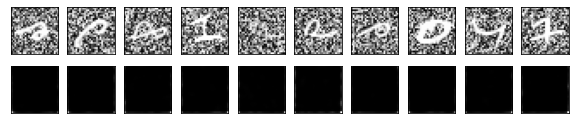

In [62]:
xtest_decoded = autoencoder.predict(xtest)
images(xtest, xtest_decoded)

## Define Model Architecture

The architecture of our model is constisted of three fully connected hidden layers. We use Rectified Linear Units(ReLUs) f(x) = max(0, x) as the activation function (or nonlinearity) followed by each hidden layer.
This non-saturating nonlinearity has been proven to be faster to train neural networks than the saturating ones which the gradients are often approaching zero in the limiting cases.
When it comes to the larger datasets, learning faster would have a great impact on the performance of the model.
The final layer is a 10-way softmax which produces a probability distribution over the 10 class labels. We use a cross entropy loss for the optimization of the neural network, which minimizes the negative log-probability of the correct label under the predicted probability distribution over the training examples.
Although multiple model architectures were defined during the experimentation process, this selected model performed way better than the other ones and it reached a final accuracy of 96.63 percent on evaluation on the validation set.
Other refinements were made before arriving at the current model which has the following architecture.


In [67]:
ShapeOfInput = (xtrain.shape[1],xtrain.shape[2], xtrain.shape[3])

In [68]:
#Defining model architecture

model = Sequential()
model.add(Conv2D(28, (3, 3),strides=(1, 1), activation='relu', kernel_initializer='he_uniform', input_shape=ShapeOfInput))
model.add(BatchNormalization())
model.add(Conv2D(28, (3, 3),strides=(1, 1), activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dense(64, activation = 'relu',kernel_initializer='he_uniform'))
model.add(Conv2D(48, (3, 3), strides = (1, 1), activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Conv2D(48, (3, 3), strides=(1, 1), activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3), strides=(1, 1), activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),strides=(1, 1), activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(GlobalAveragePooling2D())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax')) #10 because of the number of classes of digits

#save model
model.save('model7.h')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model7.h\assets


In [69]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 28)        112       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 28)        7084      
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 28)        112       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 28)        0         
_________________________________________________________________
dense_1 (Dense)              (None, 12, 12, 64)        1856      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 48)       

In [92]:
#tuning the Hyperparameter 
#learning rate
    
def scheduler(epoch,lr):
    lrate = lr
    k = 0.001
    if epoch%10!=0:
        return lrate
    else:
        lrate =lrate * np.exp(-k)
        return lrate

## Training the model

In [93]:
#Configure model
batch_size = 10
epochs = 30
learningrate=0.001
decay_rate=learningrate/epochs
callback =keras.callbacks.LearningRateScheduler(scheduler)
model.compile(loss='categorical_crossentropy',
            optimizer=keras.optimizers.SGD(lr=learningrate,momentum=0.95,decay=decay_rate),
            metrics=['accuracy'])

In [72]:
#Train Model
model.fit(xtrain, ytrain, 
          batch_size=batch_size,
         epochs=epochs,
         callbacks=[callback],
         validation_data=(xval, yval),verbose=1)

Epoch 1/30
960/960 [==============================] - 68s 71ms/step - loss: 0.7582 - accuracy: 0.7526 - val_loss: 0.2367 - val_accuracy: 0.9246
Epoch 2/30
960/960 [==============================] - 72s 74ms/step - loss: 0.2728 - accuracy: 0.9115 - val_loss: 0.1724 - val_accuracy: 0.9413
Epoch 3/30
960/960 [==============================] - 73s 76ms/step - loss: 0.1981 - accuracy: 0.9370 - val_loss: 0.1435 - val_accuracy: 0.9525
Epoch 4/30
960/960 [==============================] - 72s 75ms/step - loss: 0.1541 - accuracy: 0.9527 - val_loss: 0.1383 - val_accuracy: 0.9513
Epoch 5/30
960/960 [==============================] - 73s 76ms/step - loss: 0.1185 - accuracy: 0.9635 - val_loss: 0.1432 - val_accuracy: 0.9558
Epoch 6/30
960/960 [==============================] - 72s 75ms/step - loss: 0.1051 - accuracy: 0.9658 - val_loss: 0.1338 - val_accuracy: 0.9608
Epoch 7/30
960/960 [==============================] - 73s 76ms/step - loss: 0.0840 - accuracy: 0.9742 - val_loss: 0.1154 - val_accuracy:

In [73]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)
print(type(gen))

<class 'tensorflow.python.keras.preprocessing.image.ImageDataGenerator'>


In [81]:
flowOfTraining = gen.flow(xtrain, ytrain, batch_size=64)
print(len(flowOfTraining))
model.fit_generator(flowOfTraining,
                    steps_per_epoch=xtrain.shape[0]/128,epochs=epochs, verbose=1, workers=20,
                    validation_data=(xval, yval))

150
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
75/75 [==============================] - 30s 397ms/step - loss: 0.1755 - accuracy: 0.9508 - val_loss: 0.1262 - val_accuracy: 0.9638
Epoch 2/30
75/75 [==============================] - 30s 399ms/step - loss: 0.1644 - accuracy: 0.9517 - val_loss: 0.1281 - val_accuracy: 0.9650
Epoch 3/30
75/75 [==============================] - 28s 379ms/step - loss: 0.1328 - accuracy: 0.9590 - val_loss: 0.1460 - val_accuracy: 0.9588
Epoch 4/30
75/75 [==============================] - 29s 385ms/step - loss: 0.1278 - accuracy: 0.9621 - val_loss: 0.1336 - val_accuracy: 0.9604
Epoch 5/30
75/75 [==============================] - 30s 395ms/step - loss: 0.1148 - accuracy: 0.9633 - val_loss: 0.1386 - val_accuracy: 0.9629
Epoch 6/30
75/75 [==============================] - 30s 399ms/step - loss: 0.1109 - accuracy: 0.9652 - val_loss: 0.1369 - val_accuracy: 0.9625
Epoch 7/30
75/75 [==============================] - 30s 400ms/

In [82]:
#model evaluation
scores = model.evaluate(xval, yval, batch_size = batch_size, verbose=1)

240/240 [==============================] - 3s 14ms/step - loss: 0.1089 - accuracy: 0.9688


In [83]:
print(scores)

[0.10888783633708954, 0.96875]


In [84]:
##Prediction
prediction = model.predict(xtest)

#round up predicted values
prediction = np.round(prediction)

#convert to integers
prediction_int = prediction.astype(int)

#convert to digits
prediction_digits = np.argmax(prediction_int, axis=-1)

In [85]:
#generate the Id column
Id = np.array(range(len(prediction)))

#generate pandas dataframe in order to save id and predictions in
final_sample = pd.DataFrame({'Id': Id, 'Category': list(prediction_digits)}, columns=['Id', 'Category'])

In [91]:
#write results to  csv file
path = r'C:\\Users\\Light\\Desktop\\Artificial Neural Network\\'
final_sample.to_csv(path + "final_sample.csv")

In [87]:
final_sample[0:15]

,Id,Category
0,0,6
1,1,6
2,2,8
3,3,4
4,4,3
5,5,9
6,6,6
7,7,0
8,8,2
9,9,4


## Difficulties

Building the most achivied model has not been possible due to:

 - The meticulousness, the tediousness and the iterativeness of the process require relevant and powerful computation. Therefore, working from a local evironment with low GPU make it worser. 

 - The Convolutional autoencoder was not a success as aimed. However, it did not impact the predictions. 

 - Jupyter Notebook has crushed several time maybe due to Keras imports, Google Colab seemed to be very slow, Visual Studio Code was the perfect match.
 

## Areas for Improvement

The accuracy reached can be improved as it is far from the 99%. Hence, for future model improvement we should probably:

- Make the convolutional autoencoder reach the aimed thresehold 
- Find a way to use the Kfold cross validation
- Tune further hyperparameters 
- Try other optimzers 


## Acknowledgements and References 

- https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

- https://github.com/shubham99bisht/Handwritten-digit-recognition-MNIST

- https://www.python-course.eu/neural_network_mnist.php

- https://github.com/ayooshkathuria/MNIST-handwritten-digit-recognition

- Worked with my classmate Ulrick on this project, checkout his Github: https://github.com/Alpatch2020 